In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/loan-status-prediction/loan_data.csv


# Load the dataset

In [2]:
df = pd.read_csv("/kaggle/input/loan-status-prediction/loan_data.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [4]:
df = df.drop(['Loan_ID'], axis=1)

In [5]:
# The numbers of rows and columns in the dataset.
df.shape

(381, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             376 non-null    object 
 1   Married            381 non-null    object 
 2   Dependents         373 non-null    object 
 3   Education          381 non-null    object 
 4   Self_Employed      360 non-null    object 
 5   ApplicantIncome    381 non-null    int64  
 6   CoapplicantIncome  381 non-null    float64
 7   LoanAmount         381 non-null    float64
 8   Loan_Amount_Term   370 non-null    float64
 9   Credit_History     351 non-null    float64
 10  Property_Area      381 non-null    object 
 11  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 35.8+ KB


# Handling the missing values in the dataset

In [7]:
df.isnull().sum()

Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode().iloc[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode().iloc[0])
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode().iloc[0]).astype(int)
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode().iloc[0]).astype(int)

df['Dependents'] = df['Dependents'].replace(['0', '1', '2', '3+'], [0,1,2,3,])
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode().iloc[0])

df['CoapplicantIncome'] = df['CoapplicantIncome'].astype(int)
df['LoanAmount'] = df['LoanAmount'].astype(int)

In [9]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Converting categorical data into numerical form

In [10]:
def cat_to_num(df, c_var):
    for i in c_var:
        uniques_value = df[i].unique()
        df[i].replace(uniques_value, [0, 1], inplace=True)

    for i in ['Property_Area']:
        uniques_value = df[i].unique()
        df[i].replace(uniques_value, [0, 1, 3], inplace=True)

In [11]:
c_variables = ['Gender', 'Married', 'Education', 'Education','Self_Employed', 'Loan_Status']

cat_to_num(df, c_variables)

In [12]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,1.0,0,0,4583,1508,128,360,1,0,0
1,0,0,0.0,0,1,3000,0,66,360,1,1,1
2,0,0,0.0,1,0,2583,2358,120,360,1,1,1
3,0,1,0.0,0,0,6000,0,141,360,1,1,1
4,0,0,0.0,1,0,2333,1516,95,360,1,1,1


# Data Visualization

#### Analyze categorical values assigned to columns

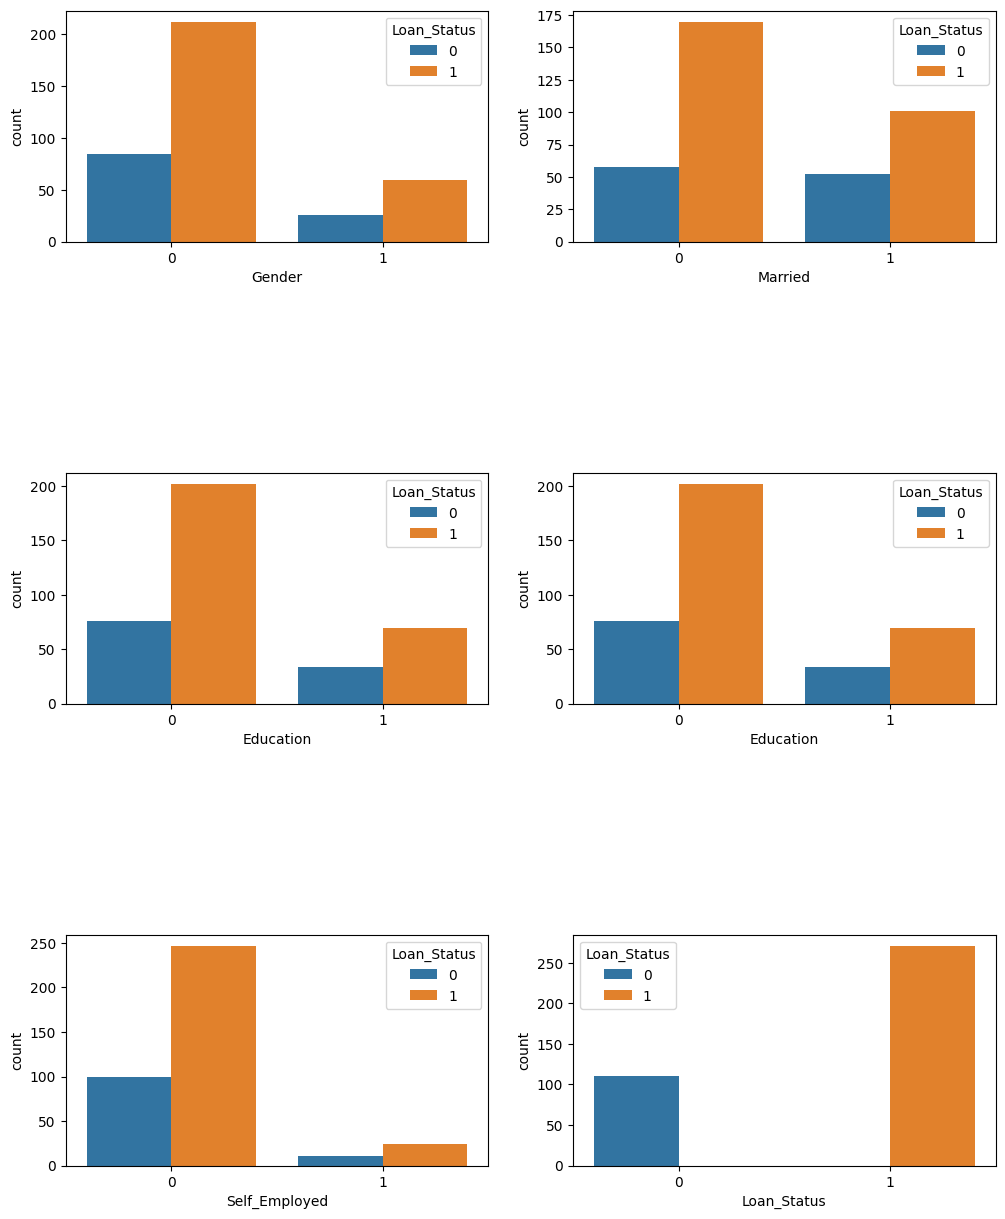

In [13]:
fig, ax = plt.subplots(3, 2, figsize=(12,15))

for index, cat_col in enumerate(c_variables):
    row, col = index//2, index%2
    sns.countplot(x=cat_col, data=df, hue='Loan_Status', ax=ax[row, col])

plt.subplots_adjust(hspace=1)

#### Analyze Numerical Columns

       ApplicantIncome  CoapplicantIncome  LoanAmount
count       381.000000         381.000000  381.000000
mean       3579.845144        1277.272966  104.986877
std        1419.813818        2340.818546   28.358464
min         150.000000           0.000000    9.000000
25%        2600.000000           0.000000   90.000000
50%        3333.000000         983.000000  110.000000
75%        4288.000000        2016.000000  127.000000
max        9703.000000       33837.000000  150.000000


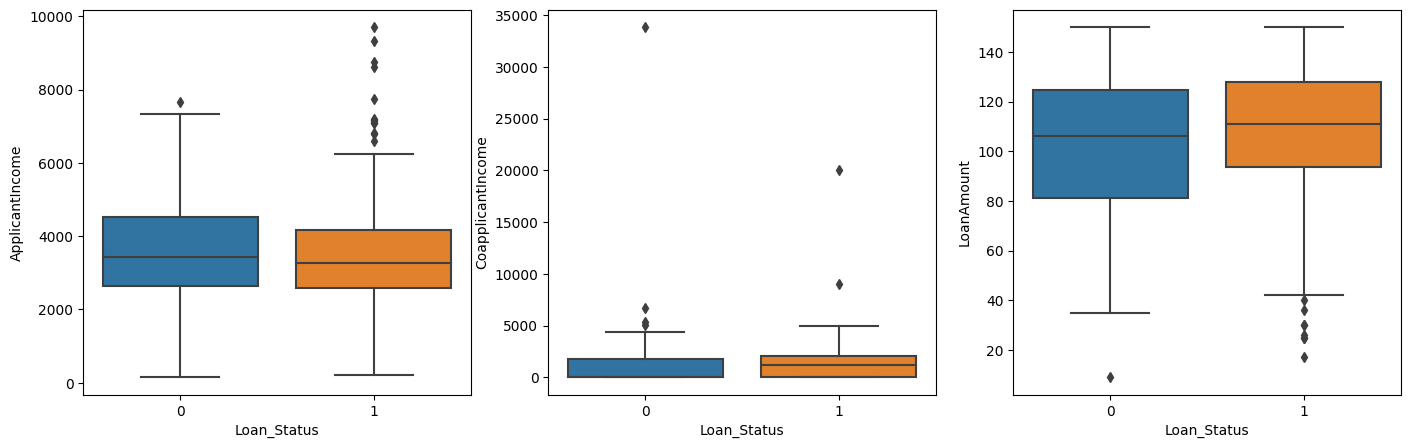

In [14]:
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

fig,axes = plt.subplots(1,3,figsize=(17,5))
for idx,cat_col in enumerate(numerical_columns):
    sns.boxplot(y=cat_col,data=df,x='Loan_Status',ax=axes[idx])

print(df[numerical_columns].describe())
plt.subplots_adjust(hspace=1)

# Preprocessing Data

In [15]:
X = df.drop(['Loan_Status'], axis=1)
y = df['Loan_Status']

In [16]:
X.shape, y.shape

((381, 11), (381,))

### Splitting dataset into train and test

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((304, 11), (304,), (77, 11), (77,))

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Model - DecisionTreeClassifier

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,roc_auc_score

In [21]:
model = DecisionTreeClassifier(max_depth=3,min_samples_leaf = 35)

In [22]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=35)

# Testing Part

In [23]:
y_pred = model.predict(X_test)

In [24]:
accuracy = accuracy_score(y_test, y_pred)
roc_score = roc_auc_score(y_test, y_pred)

print(f'Accuracy Score: {accuracy*100:0.2f}%')
print(f'Roc Score: {roc_score*100:0.2f}%')

Accuracy Score: 81.82%
Roc Score: 66.67%


In [25]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,7,14,21
1,0,56,56
All,7,70,77
